In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


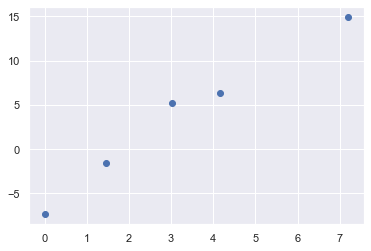

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(5)
y = 3 * x - 5 + rng.randn(5)
plt.scatter(x, y);

In [3]:
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00])

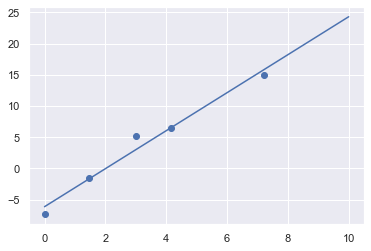

In [4]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 5)
yfit = regr.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [33]:
import pandas as pd
import numpy as np

df = pd.read_excel('test.xlsx')

#X = dataset.iloc[ : , 2:].values
#Y = dataset.iloc[ : , 1 ].values



In [6]:
df

,頻道名稱,頻道收入,訂閱數,近一週總觀看數,近一週總留言數,近一週總按讚數
0,蔡淘貴,400000,873000,1420000,1500,37000
1,蔡阿嘎,350000,2460000,800000,1800,13000
2,台灣大胃王丁丁/Ding-Ding,220000,752000,580000,2273,10000
3,本本,50000,64400,380000,751,7700
4,阿滴英文,150000,2640000,50000,351,3333
5,這群人TGOP,500000,3330000,2900000,2520,30000


In [7]:
X = df[['近一週總觀看數']]
Y = df['頻道收入'].values

Text(0, 0.5, '頻道收入')

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36913 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30475 missing from c

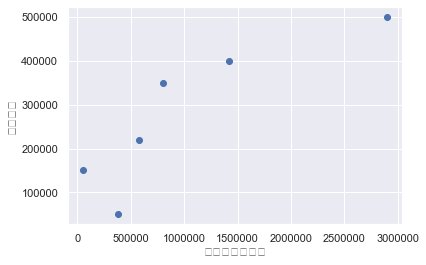

In [8]:
plt.scatter(X,Y)
plt.xlabel('近一週總觀看數')
plt.ylabel('頻道收入')

In [9]:
clf = LinearRegression()


In [10]:
clf.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
clf.coef_
#斜率

array([0.14108816])

In [12]:
clf.intercept_


134188.2583626774

In [13]:
clf.predict(np.array([ [5],[10] ]))


array([134188.9638035 , 134189.66924432])

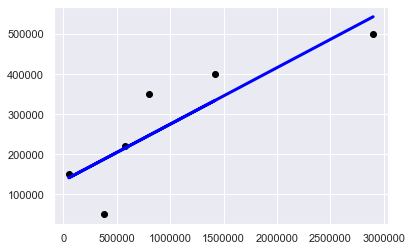

In [14]:
plt.scatter(X, Y, color='black')
plt.plot(X, clf.predict(X), color='blue', linewidth=3)
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)

In [16]:
X.head()


,近一週總觀看數
0,1420000
1,800000
2,580000
3,380000
4,50000


In [17]:
X_[0:3,:]


array([[1.0000e+00, 1.4200e+06, 2.0164e+12],
       [1.0000e+00, 8.0000e+05, 6.4000e+11],
       [1.0000e+00, 5.8000e+05, 3.3640e+11]])

In [18]:
regr = LinearRegression()
regr.fit(X_, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

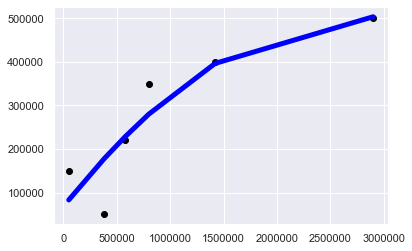

In [19]:
plt.scatter(X, Y, color='black')
poly = PolynomialFeatures(degree=2)
X2 = X.sort_values(['近一週總觀看數'])
X2_ = poly.fit_transform(X2)
plt.plot(X2, regr.predict(X2_), linewidth = 5, color="blue")
plt.show()

In [20]:
X_array = df.iloc[ : , 2:].values
X_array

array([[ 873000, 1420000,    1500,   37000],
       [2460000,  800000,    1800,   13000],
       [ 752000,  580000,    2273,   10000],
       [  64400,  380000,     751,    7700],
       [2640000,   50000,     351,    3333],
       [3330000, 2900000,    2520,   30000]])

In [21]:
X_array.shape

(6, 4)

In [22]:
X 

,近一週總觀看數
0,1420000
1,800000
2,580000
3,380000
4,50000
5,2900000


In [23]:
Y #頻道收入

array([400000, 350000, 220000,  50000, 150000, 500000])

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
X[: , 0] = labelencoder.fit_transform(X[ : , 0])

onehotencoder = OneHotEncoder(categories='auto')
X = onehotencoder.fit_transform(X)


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [25]:
X = X[: , 1:]

TypeError: '(slice(None, None, None), slice(1, None, None))' is an invalid key

In [26]:
X

,近一週總觀看數
0,1420000
1,800000
2,580000
3,380000
4,50000
5,2900000


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
y_pred

array([761008.90066099, 218197.43718233])

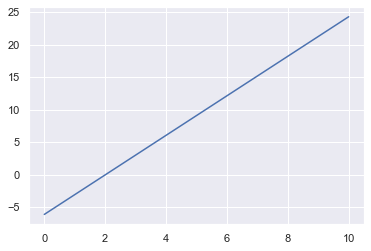

In [31]:
plt.plot(xfit, yfit);